# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# Plot figures
%matplotlib inline
import matplotlib        as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)




# save figures
ROOT_DIR = "."
DIR      = "spectral_clustering"
FIG_PATH = os.path.join(ROOT_DIR, "images", DIR)

os.makedirs(FIG_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(os.path.join(FIG_PATH, fig_id + "." + fig_extension),\
                bbox_inches='tight',\
                pad_inches=0.09,\
                format=fig_extension,\
                dpi=resolution)



# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## **Introduction – Classification _vs_ Clustering**

**- Although most of the applications of Machine Learning today are based on supervised learning (and as a result, this is where most of the investments go to), the vast majority of the available data is unlabeled: we have the input features X, but we do not have the labels y.**

**- The computer scientist Yann LeCun famously said that “if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake.”**

**- In other words, there is a huge potential in unsupervised learning that we have only barely started to sink our teeth into.**

**A few more unsupervised learning tasks and algorithms:**

**Clustering**
The goal is to group similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

**Anomaly detection**
The objective is to learn what “normal” data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

**Density estimation**
This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

## Additional Clustering Algorithms

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

### Spectral Clustering

This algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e., it reduces its dimensionality),

then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn’s implementation uses K-Means).

Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g., to identify clusters of friends on a social network).

It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
# Model with gamma = 100
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [ ]:
# Model with gamma = 1
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [ ]:
# the affinity_matrix
print( 'affinity_matrix' )
sc1.affinity_matrix_

affinity_matrix


array([[1.00000000e+000, 1.90436981e-076, 1.58496388e-064, ...,
        5.01303073e-146, 6.31095136e-038, 2.22951625e-031],
       [1.90436981e-076, 1.00000000e+000, 3.02140630e-001, ...,
        3.86141392e-022, 1.03067800e-187, 1.56076181e-051],
       [1.58496388e-064, 3.02140630e-001, 1.00000000e+000, ...,
        6.42678348e-026, 1.56928855e-170, 2.51232793e-043],
       ...,
       [5.01303073e-146, 3.86141392e-022, 6.42678348e-026, ...,
        1.00000000e+000, 2.95948543e-313, 6.83282131e-070],
       [6.31095136e-038, 1.03067800e-187, 1.56928855e-170, ...,
        2.95948543e-313, 1.00000000e+000, 2.82169044e-135],
       [2.22951625e-031, 1.56076181e-051, 2.51232793e-043, ...,
        6.83282131e-070, 2.82169044e-135, 1.00000000e+000]])

In [ ]:
# The percentile of the affinity_matrix_ at 95% level
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [ ]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

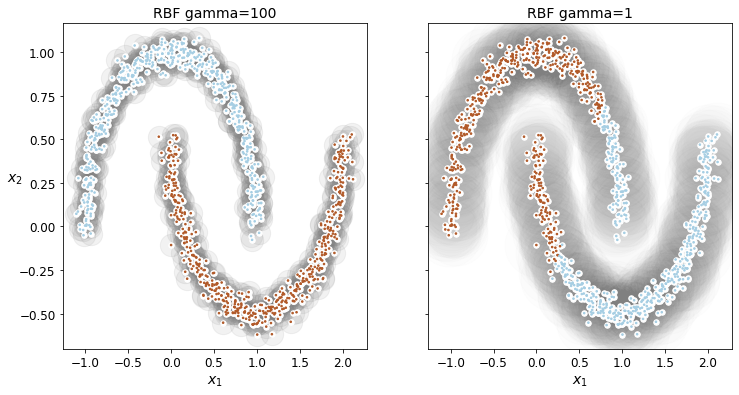

In [ ]:
# Figure
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()


### Agglomerative Clustering

**A hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water and gradually attaching to each other until there’s one big group of bubbles. Similarly, at each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances). If you drew a tree with a branch for every pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances. This approach scales very well to large numbers of instances or clusters. It can capture clusters of various shapes, it produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix, which is a sparse m × m matrix that indicates which pairs of instances are neighbors (e.g., returned by sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm does not scale well to large datasets.**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
XX = np.array( [0, 2, 5, 8.5] ).reshape(-1, 1)
print('Data: X = ')
print( XX )

agg = AgglomerativeClustering(linkage="complete").fit(XX)

Data: X = 
[[0. ]
 [2. ]
 [5. ]
 [8.5]]


In [ ]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [ ]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_components_',
 'n_connected_components_',
 'n_leaves_']

In [ ]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])